Fuente https://www.datosabiertos.gob.pe/dataset/donaciones-covid-19-ministerio-de-econom%C3%ADa-y-finanzas-mef

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving pcm_donaciones.csv to pcm_donaciones.csv


In [ ]:
import pandas as pd
# Leer el archivo CSV cargado
df = pd.read_csv("pcm_donaciones.csv", encoding='latin1')




In [ ]:
df


,ANO_EJE,REGION,TIPO_GOBIERNO,TIPO_GOBIERNO_NOMBRE,SECTOR,SECTOR_NOMBRE,PLIEGO,PLIEGO_NOMBRE,SEC_EJEC,EJECUTORA,...,NOMBRE_FAMILIA,ITEM_BIEN,NOMBRE_ITEM,UNIDAD_MEDIDA,UNIDAD_MEDIDA_DESC,MARCA,NOMBRE_MARCA,CANT_ARTICULO,PRECIO_UNIT,VALOR_TOTAL
0,2020,LIMA,E,GOBIERNO NACIONAL,11,SALUD,11,M. DE SALUD,1726,148,...,PARACETAMOL.,72,PARACETAMOL 10 mg/mL INY 100 mL,112,UNIDAD,328,SIN MARCA,250.0,1.700000,425.0
1,2020,LIMA,E,GOBIERNO NACIONAL,11,SALUD,11,M. DE SALUD,1726,148,...,SOLUCIÓN PARA DIÁLISIS PERITONEAL.,14,SOLUCIONES ISOTÓNICAS INY,112,UNIDAD,328,SIN MARCA,250.0,14.410000,3602.5
2,2020,LIMA,E,GOBIERNO NACIONAL,11,SALUD,11,M. DE SALUD,1726,148,...,SAL DE REHIDRATACIÓN,4,FORMULACIONES DE SALES DE REHIDRATACION ORAL S...,112,UNIDAD,328,SIN MARCA,250.0,4.440000,1110.0
3,2020,LIMA,E,GOBIERNO NACIONAL,11,SALUD,11,M. DE SALUD,1726,148,...,CAMA DE METAL,16,CAMA DE METAL HOSPITALARIA DOS MANIVELAS,112,UNIDAD,328,SIN MARCA,1.0,6495.000000,6495.0
4,2020,LIMA,E,GOBIERNO NACIONAL,11,SALUD,11,M. DE SALUD,1686,146,...,PANES,1,PAN BAGUETTE,112,UNIDAD,1468,SIN MARCA,1425.0,0.000001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,2020,PROVINCIA CONSTITUCIONAL DEL CALLAO,R,GOBIERNO REGIONAL,99,GOBIERNOS REGIONALES,464,GOBIERNO REGIONAL DE LA PROVINCIA CONSTITUCION...,1316,400,...,ROPA QUIRÚRGICA PARA PERSONAL MÉDICO Y PACIENTE,1317,BOTA DESCARTABLE X 50 PARES,112,UNIDAD,7,SIN MARCA2,150.0,0.800000,120.0
8447,2020,PROVINCIA CONSTITUCIONAL DEL CALLAO,R,GOBIERNO REGIONAL,99,GOBIERNOS REGIONALES,464,GOBIERNO REGIONAL DE LA PROVINCIA CONSTITUCION...,1316,400,...,MASCARILLAS DESCARTABLES,179,RESPIRADOR NASAL TIPO N-95,112,UNIDAD,328,SIN MARCA,250.0,7.500000,1875.0
8448,2020,PROVINCIA CONSTITUCIONAL DEL CALLAO,R,GOBIERNO REGIONAL,99,GOBIERNOS REGIONALES,464,GOBIERNO REGIONAL DE LA PROVINCIA CONSTITUCION...,1316,400,...,GUANTES PARA EXAMEN DESCARTABLES (NO QUIRÚRGICOS),145,GUANTE PARA EXAMEN DESCARTABLE DE NITRILO SIN ...,112,UNIDAD,2234,SIN FIN,100.0,0.350000,35.0
8449,2020,PROVINCIA CONSTITUCIONAL DEL CALLAO,R,GOBIERNO REGIONAL,99,GOBIERNOS REGIONALES,464,GOBIERNO REGIONAL DE LA PROVINCIA CONSTITUCION...,1316,400,...,GUANTES PARA EXAMEN DESCARTABLES (NO QUIRÚRGICOS),143,GUANTE PARA EXAMEN DESCARTABLE DE NITRILO SIN ...,112,UNIDAD,1385,SIN MARCA,100.0,0.350000,35.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ANO_EJE                  8451 non-null   int64  
 1   REGION                   8451 non-null   object 
 2   TIPO_GOBIERNO            8451 non-null   object 
 3   TIPO_GOBIERNO_NOMBRE     8451 non-null   object 
 4   SECTOR                   8451 non-null   int64  
 5   SECTOR_NOMBRE            8451 non-null   object 
 6   PLIEGO                   8451 non-null   int64  
 7   PLIEGO_NOMBRE            8451 non-null   object 
 8   SEC_EJEC                 8451 non-null   int64  
 9   EJECUTORA                8451 non-null   int64  
 10  EJECUTORA_NOMBRE         8451 non-null   object 
 11  ALMACEN                  8451 non-null   int64  
 12  SEC_ALMACEN              8451 non-null   int64  
 13  NOMBRE_ALMACEN           8451 non-null   object 
 14  TIPO_TRANSAC            

In [ ]:
# Seleccionar solo las columnas relevantes para el análisis
columnas_seleccionadas = ['REGION', 'TIPO_GOBIERNO_NOMBRE', 'SECTOR_NOMBRE', 'PLIEGO', 'PLIEGO_NOMBRE',
                          'EJECUTORA', 'EJECUTORA_NOMBRE', 'ALMACEN', 'SEC_ALMACEN', 'NOMBRE_ALMACEN',
                          'NOMBRE_PROVEEDOR', 'TIPO_USO', 'FECHA_CONFIRMA', 'GRUPO_BIEN', 'NOMBRE_GRUPO',
                          'NOMBRE_CLASE', 'ITEM_BIEN', 'NOMBRE_ITEM', 'UNIDAD_MEDIDA_DESC', 'NOMBRE_MARCA',
                          'CANT_ARTICULO', 'PRECIO_UNIT', 'VALOR_TOTAL']

# Crear un nuevo DataFrame solo con las columnas seleccionadas
df_analisis = df[columnas_seleccionadas]

In [ ]:
df_analisis

,REGION,TIPO_GOBIERNO_NOMBRE,SECTOR_NOMBRE,PLIEGO,PLIEGO_NOMBRE,EJECUTORA,EJECUTORA_NOMBRE,ALMACEN,SEC_ALMACEN,NOMBRE_ALMACEN,...,GRUPO_BIEN,NOMBRE_GRUPO,NOMBRE_CLASE,ITEM_BIEN,NOMBRE_ITEM,UNIDAD_MEDIDA_DESC,NOMBRE_MARCA,CANT_ARTICULO,PRECIO_UNIT,VALOR_TOTAL
0,LIMA,GOBIERNO NACIONAL,SALUD,11,M. DE SALUD,148,HOSPITAL EMERGENCIA ATE VITARTE,1,1,ALMACEN ESPECIALIZADO DE MEDICAMENTOS,...,58,PRODUCTOS FARMACÉUTICOS,"MEDICAMENTOS ANALGÉSICOS, ANTIPIRÉTICOS, ANTII...",72,PARACETAMOL 10 mg/mL INY 100 mL,UNIDAD,SIN MARCA,250.0,1.700000,425.0
1,LIMA,GOBIERNO NACIONAL,SALUD,11,M. DE SALUD,148,HOSPITAL EMERGENCIA ATE VITARTE,1,1,ALMACEN ESPECIALIZADO DE MEDICAMENTOS,...,58,PRODUCTOS FARMACÉUTICOS,AGENTES QUE AFECTAN EL AGUA Y LOS ELECTROLITOS...,14,SOLUCIONES ISOTÓNICAS INY,UNIDAD,SIN MARCA,250.0,14.410000,3602.5
2,LIMA,GOBIERNO NACIONAL,SALUD,11,M. DE SALUD,148,HOSPITAL EMERGENCIA ATE VITARTE,1,1,ALMACEN ESPECIALIZADO DE MEDICAMENTOS,...,58,PRODUCTOS FARMACÉUTICOS,AGENTES QUE AFECTAN EL AGUA Y LOS ELECTROL.: ...,4,FORMULACIONES DE SALES DE REHIDRATACION ORAL S...,UNIDAD,SIN MARCA,250.0,4.440000,1110.0
3,LIMA,GOBIERNO NACIONAL,SALUD,11,M. DE SALUD,148,HOSPITAL EMERGENCIA ATE VITARTE,2,0,ALMACEN PATRIMONIO,...,53,HOSPITALIZACIÓN,MOBILIARIO DE HOSPITALIZACIÓN,16,CAMA DE METAL HOSPITALARIA DOS MANIVELAS,UNIDAD,SIN MARCA,1.0,6495.000000,6495.0
4,LIMA,GOBIERNO NACIONAL,SALUD,11,M. DE SALUD,146,DIRECCION DE REDES INTEGRADAS DE SALUD LIMA ESTE,7,0,ALMACEN DE DONACIONES,...,9,ALIMENTOS Y BEBIDAS PARA PERSONAS,PAN Y PRODUCTOS AFINES,1,PAN BAGUETTE,UNIDAD,SIN MARCA,1425.0,0.000001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,PROVINCIA CONSTITUCIONAL DEL CALLAO,GOBIERNO REGIONAL,GOBIERNOS REGIONALES,464,GOBIERNO REGIONAL DE LA PROVINCIA CONSTITUCION...,400,REGION CALLAO - DIRECCION DE SALUD I CALLAO,1,1,ALMACEN CENTRAL 01,...,49,"ACCES., REPUEST. DE EQ. MÉDICOS Y QUIRÚRG. Y S...","VESTUARIO, COBERTORES, MATERIAL DESCARTABLE PA...",1317,BOTA DESCARTABLE X 50 PARES,UNIDAD,SIN MARCA2,150.0,0.800000,120.0
8447,PROVINCIA CONSTITUCIONAL DEL CALLAO,GOBIERNO REGIONAL,GOBIERNOS REGIONALES,464,GOBIERNO REGIONAL DE LA PROVINCIA CONSTITUCION...,400,REGION CALLAO - DIRECCION DE SALUD I CALLAO,1,1,ALMACEN CENTRAL 01,...,49,"ACCES., REPUEST. DE EQ. MÉDICOS Y QUIRÚRG. Y S...",MATERIAL MÉDICO,179,RESPIRADOR NASAL TIPO N-95,UNIDAD,SIN MARCA,250.0,7.500000,1875.0
8448,PROVINCIA CONSTITUCIONAL DEL CALLAO,GOBIERNO REGIONAL,GOBIERNOS REGIONALES,464,GOBIERNO REGIONAL DE LA PROVINCIA CONSTITUCION...,400,REGION CALLAO - DIRECCION DE SALUD I CALLAO,1,1,ALMACEN CENTRAL 01,...,49,"ACCES., REPUEST. DE EQ. MÉDICOS Y QUIRÚRG. Y S...",MATERIAL MÉDICO,145,GUANTE PARA EXAMEN DESCARTABLE DE NITRILO SIN ...,UNIDAD,SIN FIN,100.0,0.350000,35.0
8449,PROVINCIA CONSTITUCIONAL DEL CALLAO,GOBIERNO REGIONAL,GOBIERNOS REGIONALES,464,GOBIERNO REGIONAL DE LA PROVINCIA CONSTITUCION...,400,REGION CALLAO - DIRECCION DE SALUD I CALLAO,1,1,ALMACEN CENTRAL 01,...,49,"ACCES., REPUEST. DE EQ. MÉDICOS Y QUIRÚRG. Y S...",MATERIAL MÉDICO,143,GUANTE PARA EXAMEN DESCARTABLE DE NITRILO SIN ...,UNIDAD,SIN MARCA,100.0,0.350000,35.0


# Buscamos si hay valores nulos

In [ ]:
df_analisis.isnull().any()

REGION                  False
TIPO_GOBIERNO_NOMBRE    False
SECTOR_NOMBRE           False
PLIEGO                  False
PLIEGO_NOMBRE           False
EJECUTORA               False
EJECUTORA_NOMBRE        False
ALMACEN                 False
SEC_ALMACEN             False
NOMBRE_ALMACEN          False
NOMBRE_PROVEEDOR        False
TIPO_USO                False
FECHA_CONFIRMA           True
GRUPO_BIEN              False
NOMBRE_GRUPO            False
NOMBRE_CLASE            False
ITEM_BIEN               False
NOMBRE_ITEM             False
UNIDAD_MEDIDA_DESC      False
NOMBRE_MARCA             True
CANT_ARTICULO           False
PRECIO_UNIT             False
VALOR_TOTAL             False
dtype: bool

In [ ]:
# Eliminar filas con valores nulos en las columnas especificadas
df_analisis = df_analisis.dropna(subset=['FECHA_CONFIRMA', 'NOMBRE_MARCA'])

In [ ]:
df_analisis.shape

(8442, 23)

Seleccionarmos una muestra mas pequeñas, debido que hay mucha cantidad de datos

In [ ]:
# Seleccionar una muestra aleatoria del 10% de tus datos
df_muestra = df_analisis.sample(frac=0.5, random_state=42)

# Convertir la columna CANT_ARTICULO a tipo entero
df['CANT_ARTICULO'] = df['CANT_ARTICULO'].astype(int)

In [ ]:
df_muestra

,REGION,TIPO_GOBIERNO_NOMBRE,SECTOR_NOMBRE,PLIEGO,PLIEGO_NOMBRE,EJECUTORA,EJECUTORA_NOMBRE,ALMACEN,SEC_ALMACEN,NOMBRE_ALMACEN,...,GRUPO_BIEN,NOMBRE_GRUPO,NOMBRE_CLASE,ITEM_BIEN,NOMBRE_ITEM,UNIDAD_MEDIDA_DESC,NOMBRE_MARCA,CANT_ARTICULO,PRECIO_UNIT,VALOR_TOTAL
239,LIMA,GOBIERNO NACIONAL,SALUD,11,M. DE SALUD,124,CENTRO NACIONAL DE ABASTECIMIENTOS DE RECURSOS...,1,67,NO REFRIG - COVID-19-DONACION,...,35,PRODUCTOS QUÍMICOS INCLUYE BIO-QUÍMICOS Y GASE...,BIOQUÍMICA : REACTIVOS USO ESPECÍFICO Y USO GE...,1209,PRUEBA RÁPIDA COVID-19 IgG/IgM,DETERMINACION,SIN MARCA X 25 /NEA 194-20,250000.0,18.181440,4545360.00
2603,AYACUCHO,GOBIERNO REGIONAL,GOBIERNOS REGIONALES,444,GOBIERNO REGIONAL DEL DEPARTAMENTO DE AYACUCHO,407,GOB. REG. DE AYACUCHO - RED DE SALUD SAN MIGUEL,1,1,ALMACEN GENERAL,...,74,OFICINA,MOBILIARIO DE OFICINA,1,SILLA FIJA DE METAL,UNIDAD,NACIONAL,1.0,100.000000,100.00
3817,CUSCO,GOBIERNO REGIONAL,GOBIERNOS REGIONALES,446,GOBIERNO REGIONAL DEL DEPARTAMENTO DE CUSCO,407,GOB. REG. CUSCO - RED DE SERVICIOS DE SALUD CU...,1,2,SUB ALMACEN DE MEDICAMENTOS,...,49,"ACCES., REPUEST. DE EQ. MÉDICOS Y QUIRÚRG. Y S...",MATERIAL MÉDICO,76,MASCARILLA DESCARTABLE QUIRURGICA 3 PLIEGUES,UNIDAD,SIN MARCA,2500.0,0.840000,2100.00
212,LIMA,GOBIERNO NACIONAL,SALUD,11,M. DE SALUD,124,CENTRO NACIONAL DE ABASTECIMIENTOS DE RECURSOS...,1,67,NO REFRIG - COVID-19-DONACION,...,49,"ACCES., REPUEST. DE EQ. MÉDICOS Y QUIRÚRG. Y S...",MATERIAL MÉDICO,146,GUANTE PARA EXAMEN DESCARTABLE DE NITRILO SIN ...,UNIDAD,ANSELL X 100 /NEA 165-20,9300.0,0.373352,3472.17
4304,CUSCO,GOBIERNO REGIONAL,GOBIERNOS REGIONALES,446,GOBIERNO REGIONAL DEL DEPARTAMENTO DE CUSCO,407,GOB. REG. CUSCO - RED DE SERVICIOS DE SALUD CU...,1,2,SUB ALMACEN DE MEDICAMENTOS,...,49,"ACCES., REPUEST. DE EQ. MÉDICOS Y QUIRÚRG. Y S...",MATERIAL MÉDICO,76,MASCARILLA DESCARTABLE QUIRURGICA 3 PLIEGUES,UNIDAD,SIN MARCA,12000.0,1.105646,13267.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LIMA,GOBIERNO NACIONAL,SALUD,11,M. DE SALUD,124,CENTRO NACIONAL DE ABASTECIMIENTOS DE RECURSOS...,1,62,NO REFRIG - ESTRATEGICOS DONACIONES,...,58,PRODUCTOS FARMACÉUTICOS,MEDICAMENTOS ANTIINFECCIOSOS: ANTIPROTOZOARIOS...,2,ARTESUNATO + MEFLOQUINA 100 mg + 200 mg TAB,UNIDAD,SIN MARCA X 6 /NEA 742-20,11160.0,1.272663,14202.92
166,LIMA,GOBIERNO NACIONAL,SALUD,11,M. DE SALUD,124,CENTRO NACIONAL DE ABASTECIMIENTOS DE RECURSOS...,1,67,NO REFRIG - COVID-19-DONACION,...,49,"ACCES., REPUEST. DE EQ. MÉDICOS Y QUIRÚRG. Y S...","VESTUARIO, COBERTORES, MATERIAL DESCARTABLE PA...",1351,MANDILÓN DESCARTABLE DE PLÁSTICO,UNIDAD,PLASTIEMPAQUE X 1 /NEA 138-20,500.0,3.500000,1750.00
5994,ICA,GOBIERNO REGIONAL,GOBIERNOS REGIONALES,449,GOBIERNO REGIONAL DEL DEPARTAMENTO DE ICA,401,REGION ICA- HOSPITAL SAN JOSE DE CHINCHA,1,7,ALMACEN GENERAL 01,...,49,"ACCES., REPUEST. DE EQ. MÉDICOS Y QUIRÚRG. Y S...","VESTUARIO, COBERTORES, MATERIAL DESCARTABLE PA...",973,MANDIL DESCARTABLE ESTERIL TALLA M,UNIDAD,SIN MARCA,50.0,8.500000,425.00
1006,LIMA,GOBIERNO NACIONAL,SALUD,11,M. DE SALUD,21,HOSPITAL CAYETANO HEREDIA,1,0,ALMACEN CENTRAL,...,13,"ASEO, LIMPIEZA Y TOCADOR : REPUESTOS, ACCES...",TOCADOR Y COSMETOLOGÍA: MATERIALES,166,CHAMPU PARA CABELLO X 180 mL,UNIDAD,HEAD&SHOULDERS,2188.0,9.500000,20786.00


Cantidad de filas x columna

In [ ]:
df_muestra.shape

(4221, 23)

### Veremos la frecuencia por cada grupo de los bienes donados

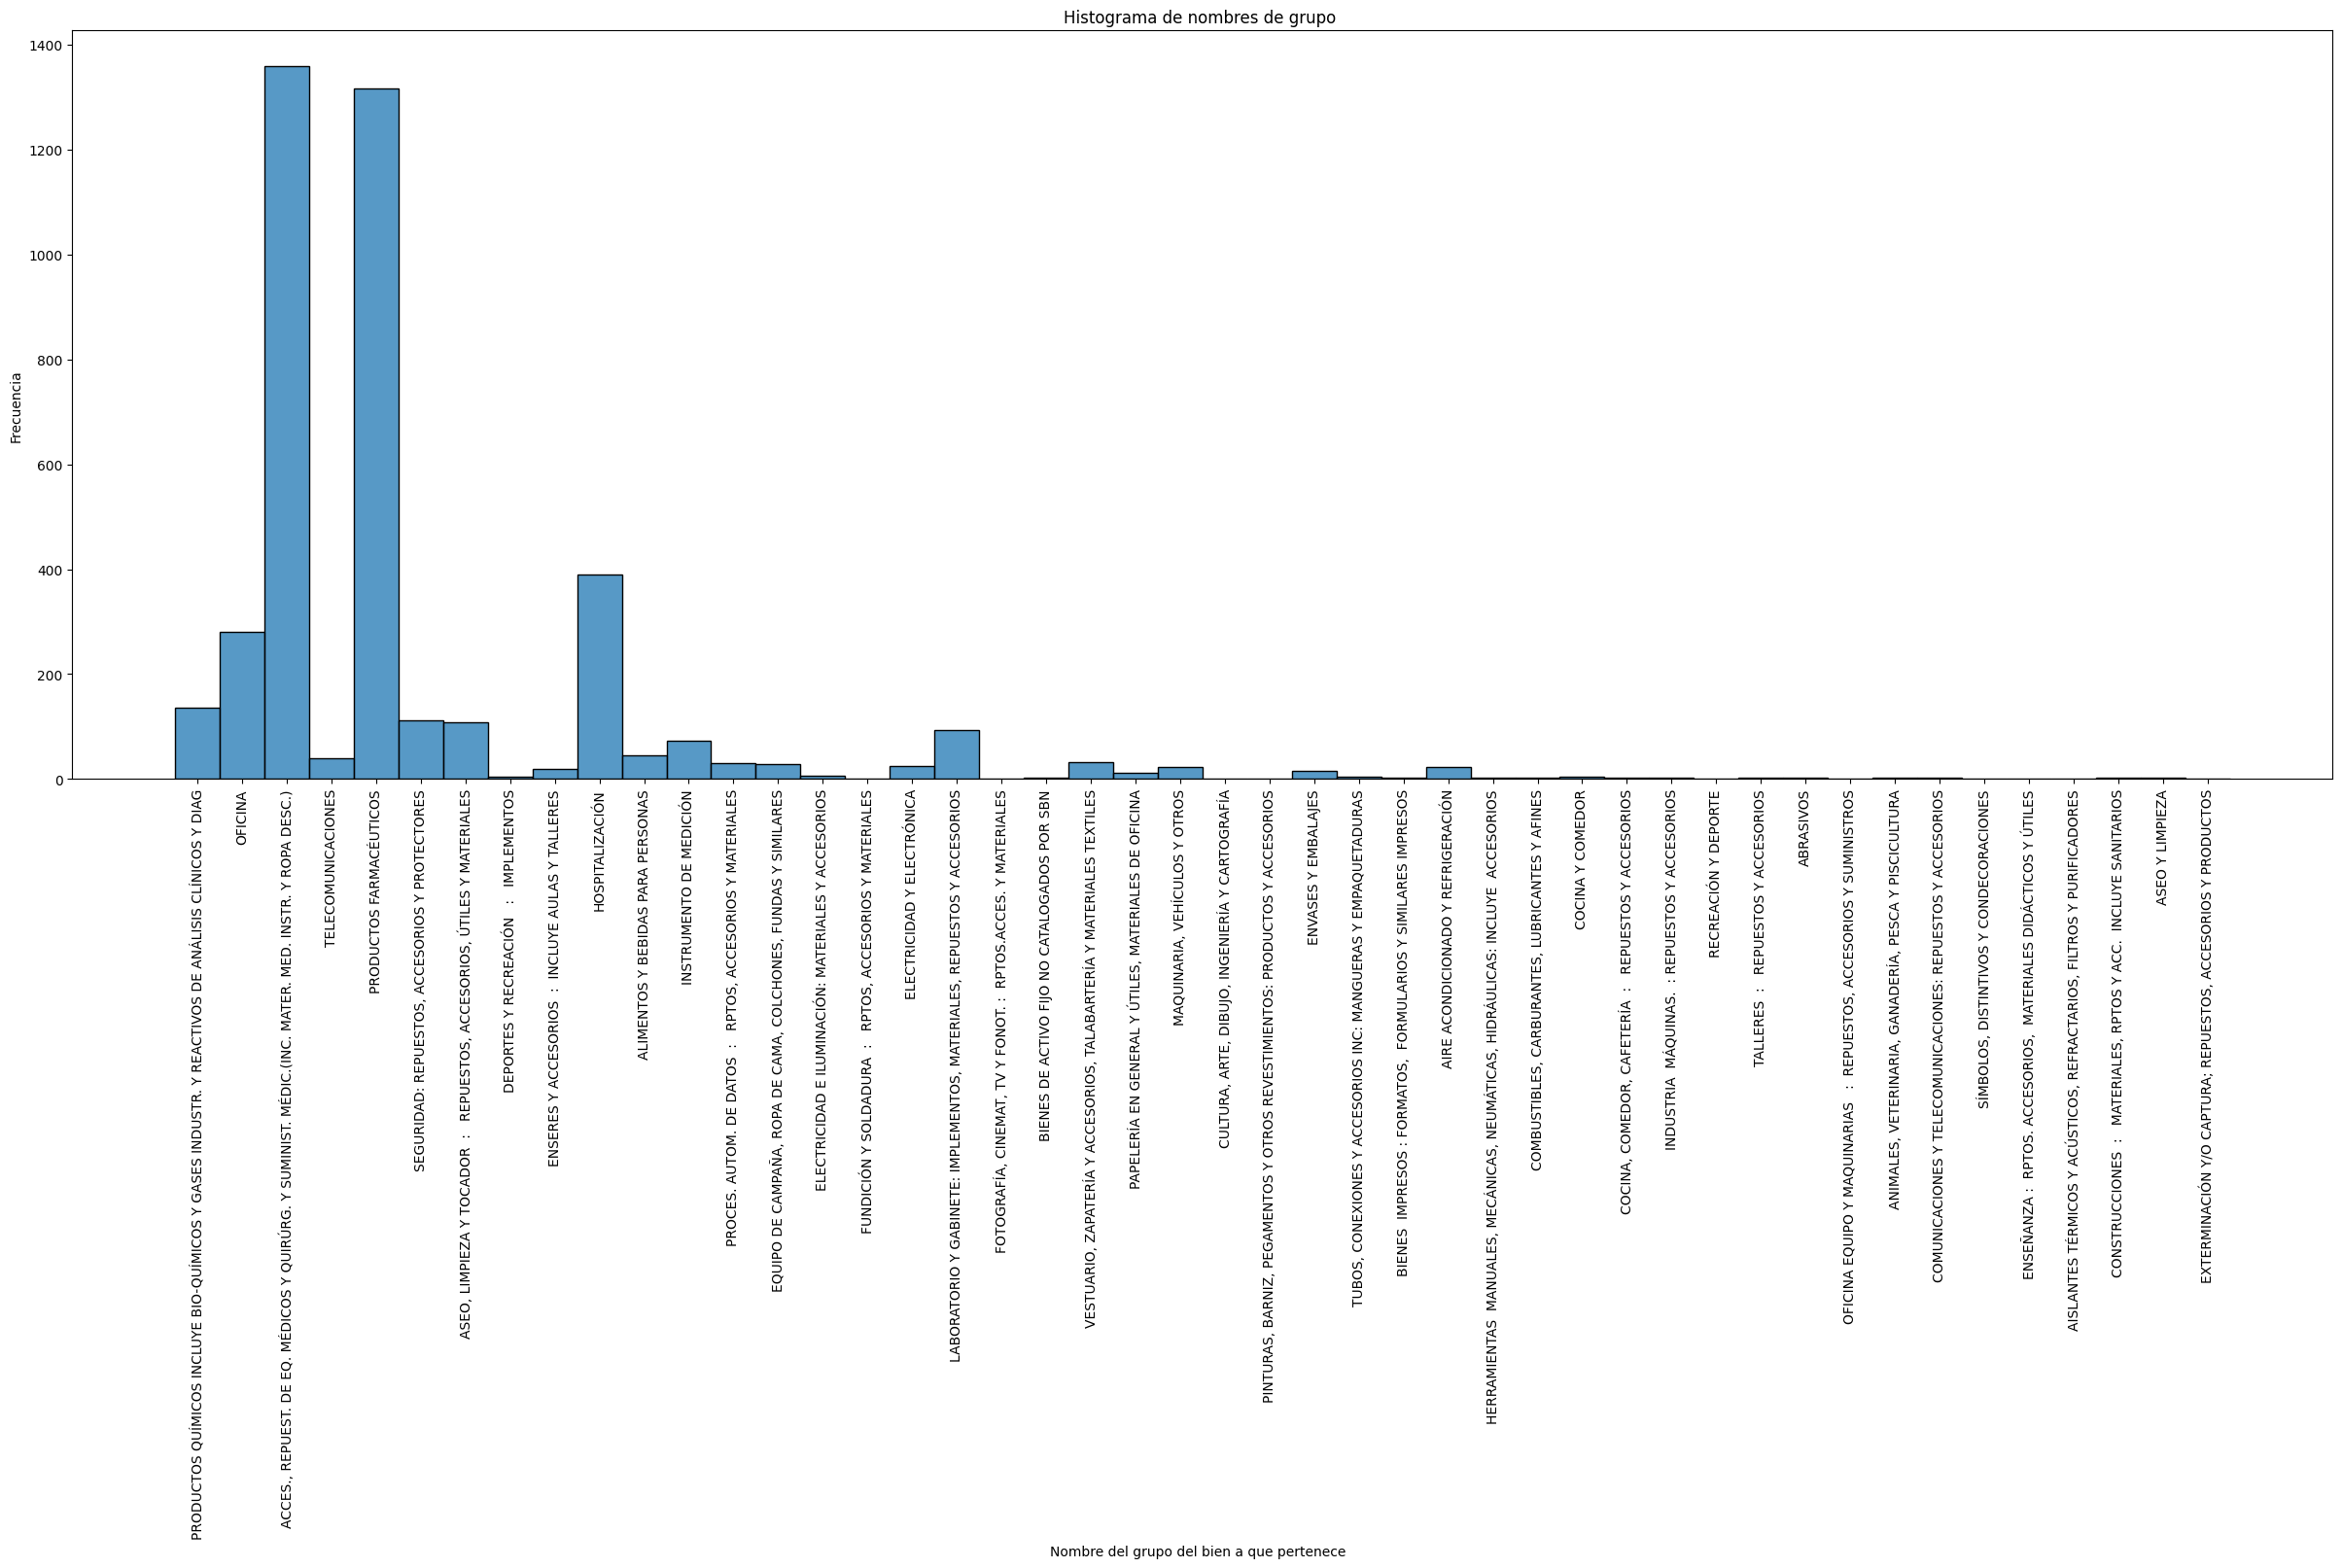

In [ ]:
plt.figure(figsize=(30, 10))
sns.histplot(x='NOMBRE_GRUPO', data=df_muestra)
plt.xlabel('Nombre del grupo del bien a que pertenece  ')
plt.ylabel('Frecuencia')
plt.title('Histograma de nombres de grupo ')
plt.xticks(rotation=90)
plt.show()


Se puede inferir que el grupo de **Productos farmaceuticos **y **equipos medicos, quirurgicos y suministros** poseen mayor frecuencia por lo que  en esos grupos recibieron mayores cantidades diferentes  de donaciones


Hallamos el total de articulos adquiridos por cada nombre de grupo

In [ ]:
# Agrupar los datos por el nombre del grupo y sumar la cantidad de artículos en cada grupo
cantidad_por_grupo = df.groupby('NOMBRE_GRUPO')['CANT_ARTICULO'].sum()
cantidad_por_grupo

NOMBRE_GRUPO
ABRASIVOS                                                                                                     9
ACCES., REPUEST. DE EQ. MÉDICOS Y QUIRÚRG. Y SUMINIST. MÉDIC.(INC. MATER. MED. INSTR. Y ROPA DESC.)    10709954
AGROPECUARIA, GANADERÍA  Y JARDINERÍA  :   REPUESTOS, ACCESORIOS Y MATERIALES                                 1
AGRÍCOLA Y PESQUERO                                                                                           5
AIRE ACONDICIONADO Y REFRIGERACIÓN                                                                           69
AIRE ACONDICIONADO Y REFRIGERACIÓN  :   REPUESTOS Y ACCESORIOS                                                3
AISLANTES TÉRMICOS Y ACÚSTICOS, REFRACTARIOS, FILTROS Y PURIFICADORES                                       289
ALAMBRES, BARRAS, PLANCHAS, PERFILES Y SIMILARES DE METAL                                                    30
ALIMENTOS Y BEBIDAS PARA PERSONAS                                                          

Hallamos el total de articulos obtenidos por cada item

In [ ]:
# Obtener la lista de nombres de grupos únicos
nombres_grupos_unicos = df['NOMBRE_GRUPO'].unique()

# Iterar sobre cada nombre de grupo y encontrar el artículo con la mayor cantidad de donaciones
for nombre_grupo in nombres_grupos_unicos:
    # Filtrar el DataFrame para incluir solo el grupo actual
    df_grupo_actual = df[df['NOMBRE_GRUPO'] == nombre_grupo]

    # Agrupar los datos por nombre del artículo y sumar el número de donaciones
    grupo_donaciones = df_grupo_actual.groupby('NOMBRE_ITEM')['CANT_ARTICULO'].sum()

    # Encontrar el artículo con la mayor cantidad de donaciones
    item_mayor_donaciones = grupo_donaciones.idxmax()
    cantidad_mayor_donaciones = grupo_donaciones.max()

     # Mostrar el resultado para este grupo
    print("En el grupo '{}', el artículo con la mayor cantidad de donaciones es '{}', con {} donaciones.".format(nombre_grupo, item_mayor_donaciones, cantidad_mayor_donaciones))


En el grupo 'PRODUCTOS FARMACÉUTICOS', el artículo con la mayor cantidad de donaciones es 'IVERMECTINA 3 mg TAB', con 2900850 donaciones.
En el grupo 'HOSPITALIZACIÓN', el artículo con la mayor cantidad de donaciones es 'ELECTROBISTURI', con 27994 donaciones.
En el grupo 'ALIMENTOS Y BEBIDAS PARA PERSONAS', el artículo con la mayor cantidad de donaciones es 'AGUA MINERAL SIN GAS X 625 mL APROX.', con 18000 donaciones.
En el grupo 'EQUIPO DE CAMPAÑA, ROPA DE CAMA, COLCHONES, FUNDAS Y SIMILARES', el artículo con la mayor cantidad de donaciones es 'MANTA DE TELA 50% ALPACA 35% LANA Y 15% SINTÉTICO 1.27 m X 1.67 m', con 877 donaciones.
En el grupo 'LABORATORIO Y GABINETE: IMPLEMENTOS, MATERIALES, REPUESTOS Y ACCESORIOS', el artículo con la mayor cantidad de donaciones es 'LANCETA DESCARTABLE RETRÁCTIL 23 G GRADUABLE X 1.3 mm, 1.8 mm , 2.3 mm', con 5360091 donaciones.
En el grupo 'TELECOMUNICACIONES', el artículo con la mayor cantidad de donaciones es 'TELEFONO CELULAR', con 44 donaciones.


Encontramos el articulo mas donado y en que grupo

In [ ]:

# Obtener la lista de nombres de grupos únicos
nombres_grupos_unicos = df['NOMBRE_GRUPO'].unique()

# Iterar sobre cada nombre de grupo y encontrar el artículo con la mayor cantidad de donaciones
for nombre_grupo in nombres_grupos_unicos:
    # Verificar si el nombre del grupo contiene alguna de las clases de interés
    if "Productos farmacéuticos" in nombre_grupo or "ACCES., REPUEST. DE EQ. MÉDICOS Y QUIRÚRG. Y SUMINIST. MÉDIC.(INC. MATER. MED. INSTR. Y ROPA DESC.)" in nombre_grupo:
        # Filtrar el DataFrame para incluir solo el grupo actual
        df_grupo_actual = df[df['NOMBRE_GRUPO'] == nombre_grupo]

        # Agrupar los datos por nombre del artículo y sumar el número de donaciones
        grupo_donaciones = df_grupo_actual.groupby('NOMBRE_ITEM')['CANT_ARTICULO'].sum()

        # Encontrar el artículo con la mayor cantidad de donaciones
        if not grupo_donaciones.empty:
            item_mayor_donaciones = grupo_donaciones.idxmax()
            cantidad_mayor_donaciones = grupo_donaciones.max()

            # Mostrar el resultado para este grupo
            print("En el grupo '{}', el artículo con la mayor cantidad de donaciones es '{}', con {} bienes adquiridos.".format(nombre_grupo, item_mayor_donaciones, cantidad_mayor_donaciones))
        else:
            print("No hay datos de donaciones en el grupo '{}'.".format(nombre_grupo))



En el grupo 'ACCES., REPUEST. DE EQ. MÉDICOS Y QUIRÚRG. Y SUMINIST. MÉDIC.(INC. MATER. MED. INSTR. Y ROPA DESC.)', el artículo con la mayor cantidad de donaciones es 'MASCARILLA DESCARTABLE QUIRURGICA 3 PLIEGUES', con 5316629 bienes adquiridos.


Numero de articulos x proveedor

In [ ]:


# Agrupar los datos por nombre del proveedor y sumar el número de artículos donados
donaciones_por_proveedor = df.groupby('NOMBRE_PROVEEDOR')['CANT_ARTICULO'].sum()

# Mostrar el resultado
print(donaciones_por_proveedor)


NOMBRE_PROVEEDOR
 CLUB DE LEONES PUNO LAGO SAGRADO                                       6
 DIRECCION  DE   SALUD  PIURA                                       24678
 DIRECCION  REGIONAL   SALUD                                         4625
 FRENTE DE DEFENSA DEL DISTRITO DE CHINCHEROS- APURIMAC                23
 FUNDACION ACUÑA CESAR VALLEJO                                       1729
                                                                    ...  
VOLUNTARIOS INTERAMERICANOS PARA EL DESARROLLO ASISTENCIAL-VIDA     18586
WORLD VISION PERU-WV PERU                                            4800
WORLD VISION PERÚ                                                   20330
XIMESA S.A.C.                                                         165
ZALL FOUNDATION                                                    333000
Name: CANT_ARTICULO, Length: 755, dtype: int64


Encontramos el proovedor con mas donaciones

In [ ]:


proveedor_mayor_donaciones = donaciones_por_proveedor.idxmax()
cantidad_mayor_donaciones = donaciones_por_proveedor.max()

print("El proveedor que más artículos donó fue '{}', con {} artículos donados.".format(proveedor_mayor_donaciones, cantidad_mayor_donaciones))


El proveedor que más artículos donó fue 'CENTRAL DE COMPRAS PUBLICAS - PERU COMPRAS', con 7884450 artículos donados.


# Region x almacen

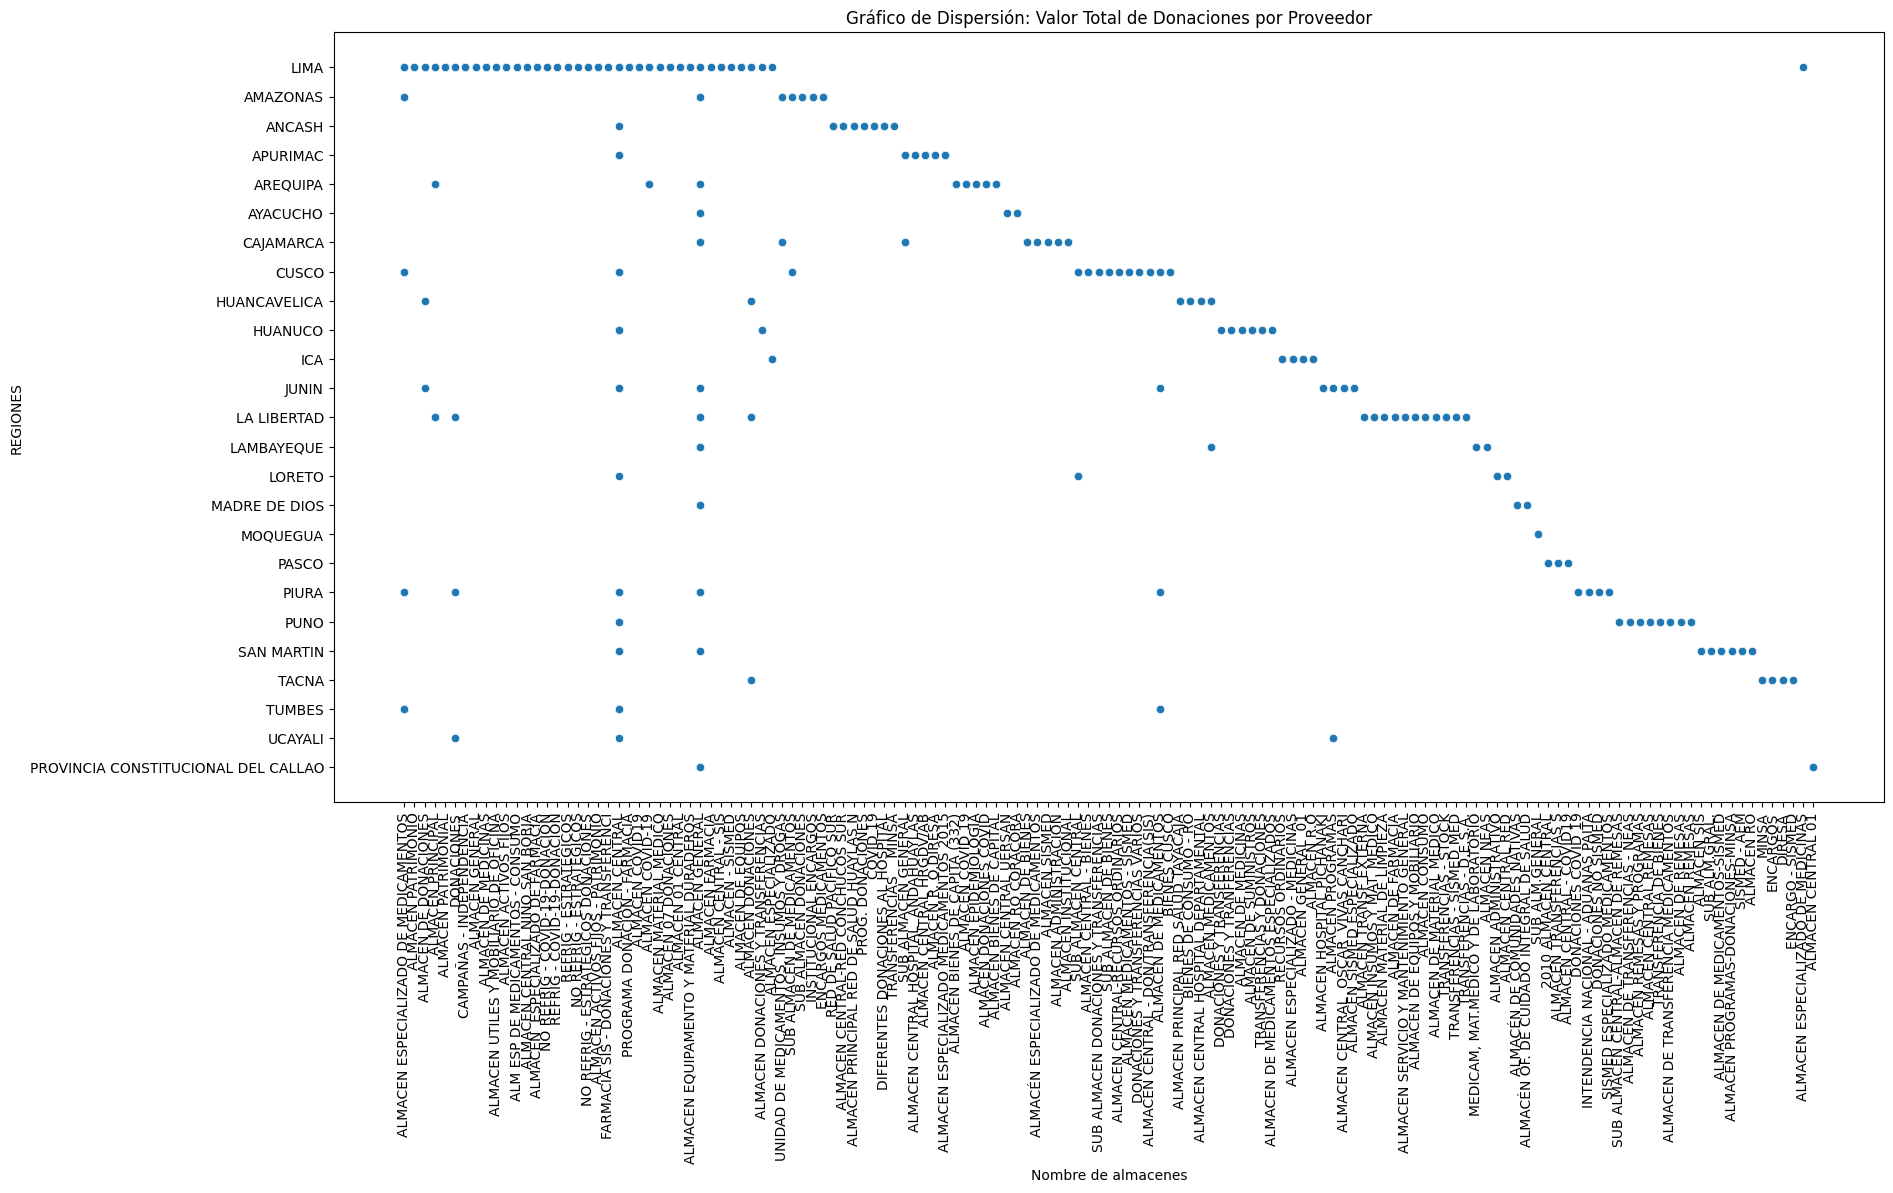

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df['NOMBRE_ALMACEN'], y=df['REGION'])
plt.xlabel("Nombre de almacenes")
plt.ylabel("REGIONES")
plt.title("Gráfico de Dispersión: Valor Total de Donaciones por Proveedor")
plt.xticks(rotation=90)  # Rotamos las etiquetas del eje x para una mejor visualización
plt.show()

Con la grafica identificamos que Lima posee mas almacenes que otras regiones
por que hay una mayor redistribucion de los articulos adqueridos

# Region x  valor total de los articulos adqueridos

<ipython-input-51-be32f46108be>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_muestra, x="REGION", y="VALOR_TOTAL", estimator=sum, ci=None)


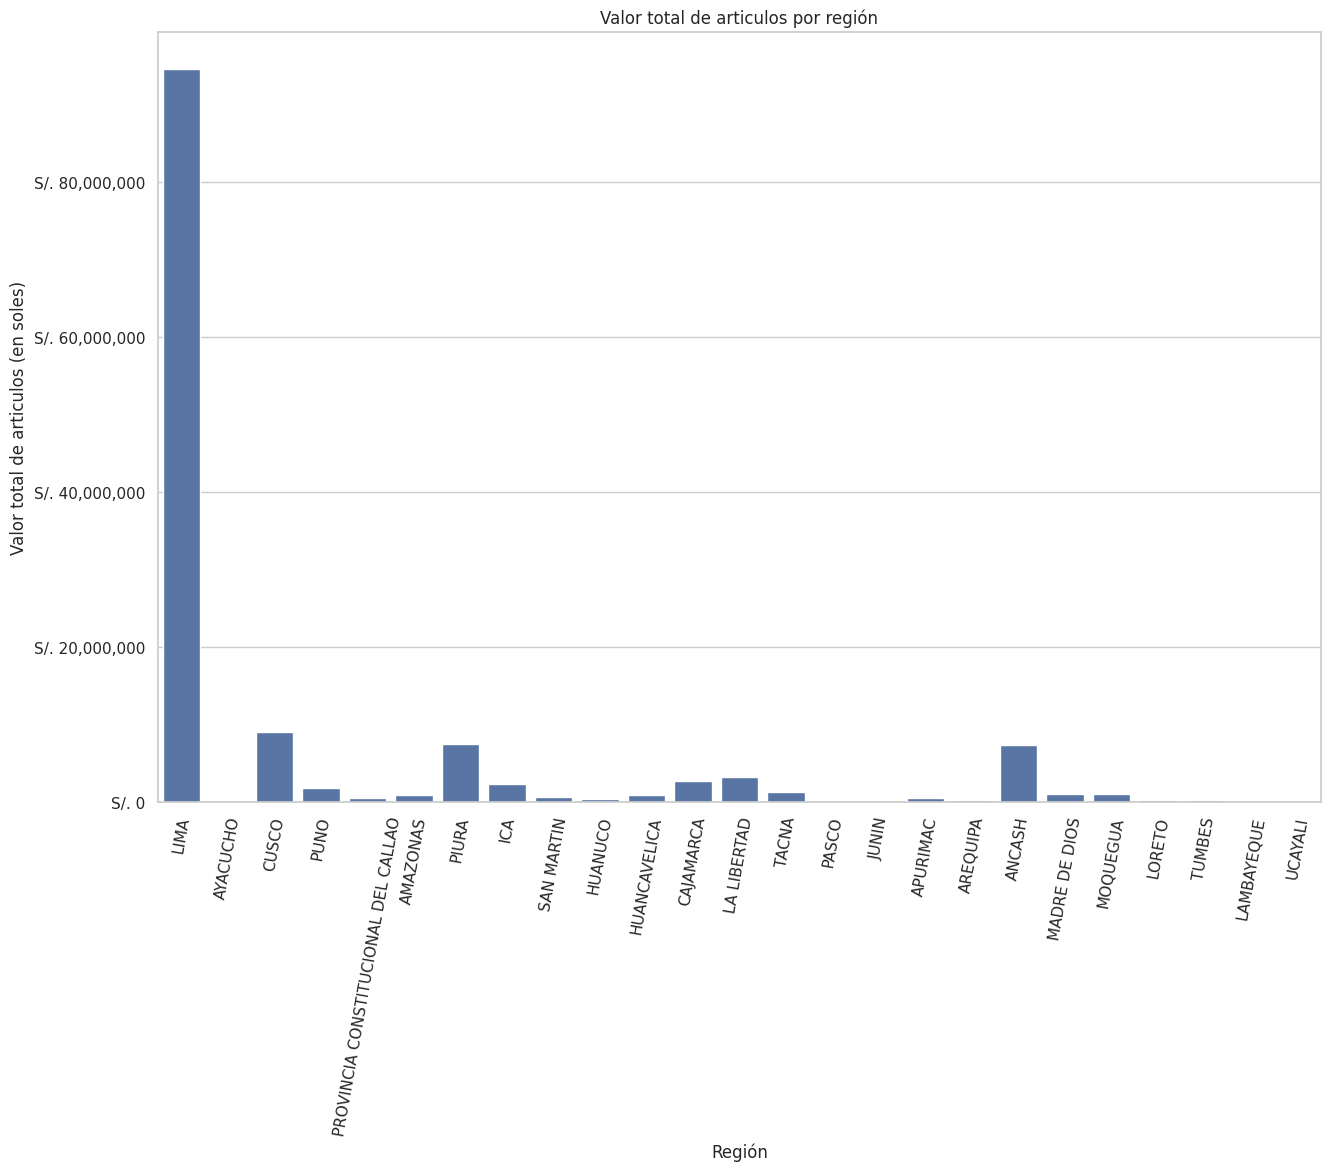

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(data=df_muestra, x="REGION", y="VALOR_TOTAL", estimator=sum, ci=None)

# Formatear las etiquetas del eje y para que reflejen 6 cifras en soles
formatter = ticker.StrMethodFormatter('S/. {x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.xlabel("Región")
plt.ylabel("Valor total de articulos (en soles)")
plt.title("Valor total de articulos por región")
plt.xticks(rotation=80)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()

Lima posee la mayor valor total de donaciones en soles,lo que quiere decir posee articulos de mayor valor adquisitivo y no en cantidades

---



In [ ]:
df_muestra['REGION'].value_counts()

REGION
CUSCO                                  1176
LIMA                                    722
AMAZONAS                                483
ICA                                     372
PUNO                                    326
PIURA                                   213
LA LIBERTAD                             151
CAJAMARCA                               120
SAN MARTIN                               91
HUANCAVELICA                             78
PROVINCIA CONSTITUCIONAL DEL CALLAO      68
AYACUCHO                                 66
ANCASH                                   57
APURIMAC                                 50
HUANUCO                                  45
JUNIN                                    38
TACNA                                    38
AREQUIPA                                 32
TUMBES                                   25
LORETO                                   17
MADRE DE DIOS                            14
LAMBAYEQUE                               13
UCAYALI                  

Cusco recibio mas articulos que otras regiones, pero no en valor total

# Calculamos la cantidad total  por cada uso de los articulos y a qeu sector pertenecen




* C CONSUMO
* V VENTA
* D DONACION
* H RECURSOS HUMANOS
* P PARA PRODUCCION





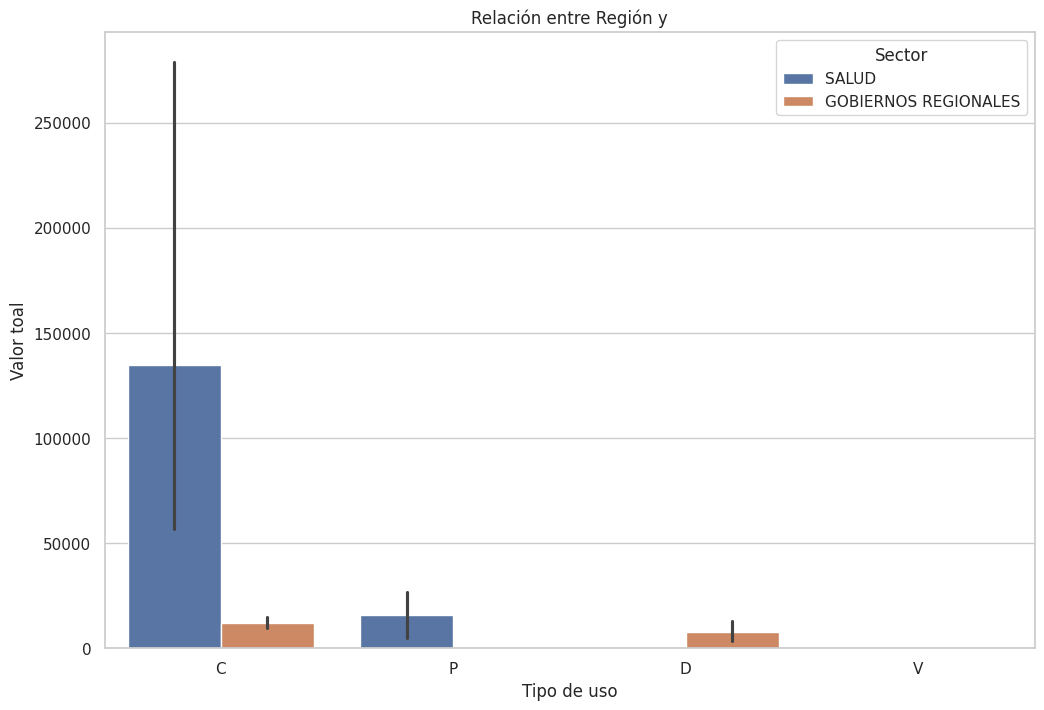

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='TIPO_USO', y='VALOR_TOTAL', hue='SECTOR_NOMBRE', data=df_muestra)
plt.title('Relación entre Región y')
plt.xlabel('Tipo de uso')
plt.ylabel('Valor toal')
plt.legend(title='Sector')
plt.show()

Encontramos que el valor total del consumo de articulos fue mayor  en el sector salud. Mientras en gobiernos regionales hubo donacion y consumo en menor medida de los articulos. No hubo articulo o en menor medida para vender.

# Relación entre region y tipo de uso

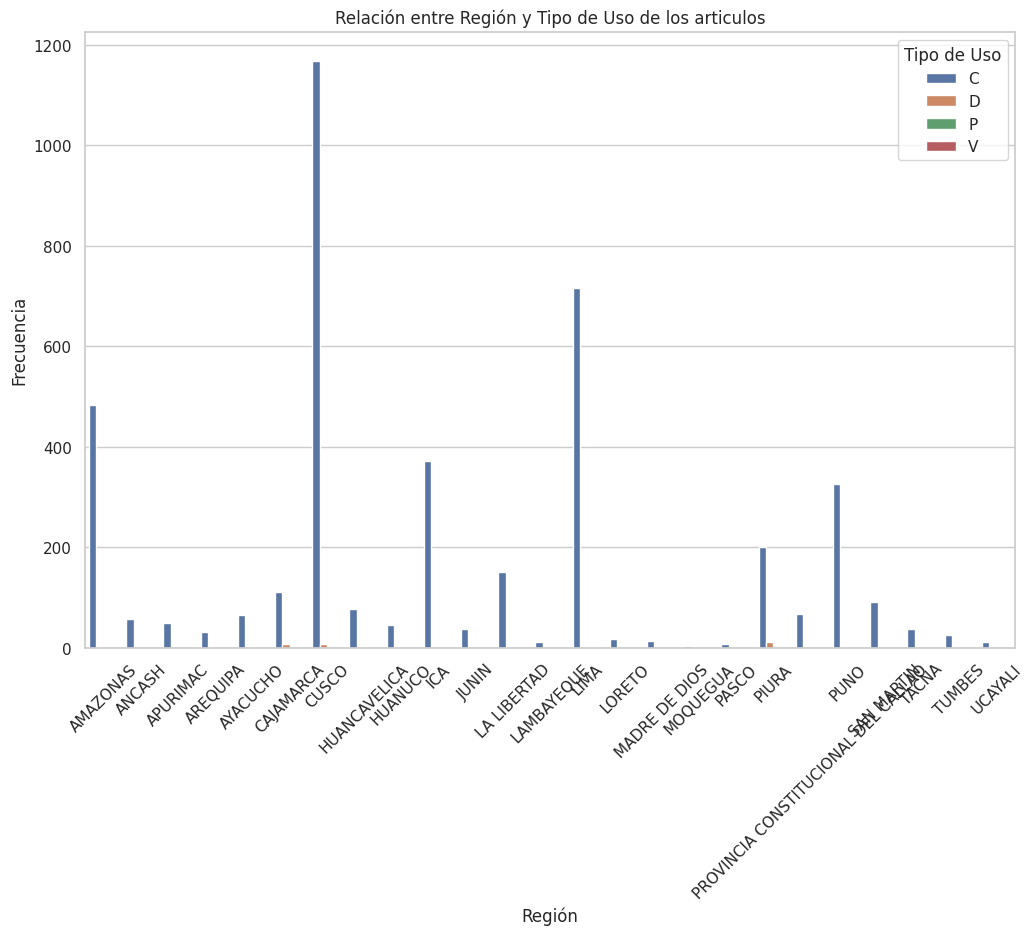

In [ ]:
# Agrupa los datos por región y tipo de uso, y cuenta la frecuencia de cada tipo de uso
frecuencia_por_region_tipo_uso = df_muestra.groupby(['REGION', 'TIPO_USO']).size().reset_index(name='Frecuencia')
plt.figure(figsize=(12, 8))
sns.barplot(x='REGION', y='Frecuencia', hue='TIPO_USO', data=frecuencia_por_region_tipo_uso)
plt.title('Relación entre Región y Tipo de Uso de los articulos')
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.legend(title='Tipo de Uso')
plt.show()

Cajamarca posee mayor frecuencia, lo cual tiene mayor priorizacion en la distribucion de los articulos.Hay poca o nulo venta consumo o produccion de estos articlos por region.

Finalmente Lima concentra mayores recursos, ya que posee en valor total (soles) los articulos y mayor cantidad de almacenes. Sin embargo Cajarma pose la amyor frecuencia en consumo de estos articulos y Cusco tiene mayor frecuencia locual recibe mas articulos diferentes.Por lo que los articulos se distribuyeron de por a sus necesidades y densidad poblacional. El articulo mas donado fueron las mascarillas